# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно определить рыночную стоимость объектов недвижимости. Задача - установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Заполнение-пропусков" data-toc-modified-id="Заполнение-пропусков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Заполнение пропусков</a></span></li><li><span><a href="#Поиск-и-удаление-дубликатов" data-toc-modified-id="Поиск-и-удаление-дубликатов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Поиск и удаление дубликатов</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Нахождение-цены-квадратного-метра" data-toc-modified-id="Нахождение-цены-квадратного-метра-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Нахождение цены квадратного метра</a></span></li><li><span><a href="#День-недели,-месяц-и-год-публикации-объявления" data-toc-modified-id="День-недели,-месяц-и-год-публикации-объявления-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>День недели, месяц и год публикации объявления</a></span></li><li><span><a href="#Этаж-квартиры---первый,-последний,-другой" data-toc-modified-id="Этаж-квартиры---первый,-последний,-другой-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Этаж квартиры - первый, последний, другой</a></span></li><li><span><a href="#Соотношение-жилой-и-общей-площади" data-toc-modified-id="Соотношение-жилой-и-общей-площади-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Соотношение жилой и общей площади</a></span></li><li><span><a href="#Отношение-площади-кухни-к-общей-площади" data-toc-modified-id="Отношение-площади-кухни-к-общей-площади-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Отношение площади кухни к общей площади</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Исследование-гистограмм-площади-квартиры,-цены,-количества-комнат-и-высоты-потолков" data-toc-modified-id="Исследование-гистограмм-площади-квартиры,-цены,-количества-комнат-и-высоты-потолков-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Исследование гистограмм площади квартиры, цены, количества комнат и высоты потолков</a></span><ul class="toc-item"><li><span><a href="#Площадь-квартиры" data-toc-modified-id="Площадь-квартиры-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Площадь квартиры</a></span></li><li><span><a href="#Время-продажи-квартиры" data-toc-modified-id="Время-продажи-квартиры-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Время продажи квартиры</a></span></li><li><span><a href="#Редкие-и-выбивающиеся-значения" data-toc-modified-id="Редкие-и-выбивающиеся-значения-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Редкие и выбивающиеся значения</a></span></li></ul></li><li><span><a href="#Факторы,-влияющие-на-стоимость-квартиры" data-toc-modified-id="Факторы,-влияющие-на-стоимость-квартиры-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Факторы, влияющие на стоимость квартиры</a></span><ul class="toc-item"><li><span><a href="#Зависимость-цены-от-площади" data-toc-modified-id="Зависимость-цены-от-площади-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Зависимость цены от площади</a></span></li><li><span><a href="#Зависимость-цены-от-числа-комнат" data-toc-modified-id="Зависимость-цены-от-числа-комнат-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Зависимость цены от числа комнат</a></span></li><li><span><a href="#Зависимость-цены-от-удаленности-от-центра" data-toc-modified-id="Зависимость-цены-от-удаленности-от-центра-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Зависимость цены от удаленности от центра</a></span></li><li><span><a href="#Зависимость-цены-от-этажа,-на-котором-расположена-квартира" data-toc-modified-id="Зависимость-цены-от-этажа,-на-котором-расположена-квартира-4.2.4"><span class="toc-item-num">4.2.4&nbsp;&nbsp;</span>Зависимость цены от этажа, на котором расположена квартира</a></span></li><li><span><a href="#Зависимость-цены-квартиры-от-даты-размещения" data-toc-modified-id="Зависимость-цены-квартиры-от-даты-размещения-4.2.5"><span class="toc-item-num">4.2.5&nbsp;&nbsp;</span>Зависимость цены квартиры от даты размещения</a></span><ul class="toc-item"><li><span><a href="#По-дню-недели" data-toc-modified-id="По-дню-недели-4.2.5.1"><span class="toc-item-num">4.2.5.1&nbsp;&nbsp;</span>По дню недели</a></span></li><li><span><a href="#По-месяцу" data-toc-modified-id="По-месяцу-4.2.5.2"><span class="toc-item-num">4.2.5.2&nbsp;&nbsp;</span>По месяцу</a></span></li><li><span><a href="#По-году" data-toc-modified-id="По-году-4.2.5.3"><span class="toc-item-num">4.2.5.3&nbsp;&nbsp;</span>По году</a></span></li></ul></li></ul></li><li><span><a href="#10-городов-с-наибольшим-числом-объявлений" data-toc-modified-id="10-городов-с-наибольшим-числом-объявлений-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>10 городов с наибольшим числом объявлений</a></span></li><li><span><a href="#Квартиры-в-Санкт-Петербурге" data-toc-modified-id="Квартиры-в-Санкт-Петербурге-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Квартиры в Санкт-Петербурге</a></span></li><li><span><a href="#Квартиры-в-центре" data-toc-modified-id="Квартиры-в-центре-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Квартиры в центре</a></span><ul class="toc-item"><li><span><a href="#Изучаем-параметры" data-toc-modified-id="Изучаем-параметры-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span>Изучаем параметры</a></span></li><li><span><a href="#Зависимость-цены-от-числа-комнат" data-toc-modified-id="Зависимость-цены-от-числа-комнат-4.5.2"><span class="toc-item-num">4.5.2&nbsp;&nbsp;</span>Зависимость цены от числа комнат</a></span></li><li><span><a href="#Зависимость-цены-от-этажа" data-toc-modified-id="Зависимость-цены-от-этажа-4.5.3"><span class="toc-item-num">4.5.3&nbsp;&nbsp;</span>Зависимость цены от этажа</a></span></li><li><span><a href="#Зависимость-цены-от-удаленности-от-центра" data-toc-modified-id="Зависимость-цены-от-удаленности-от-центра-4.5.4"><span class="toc-item-num">4.5.4&nbsp;&nbsp;</span>Зависимость цены от удаленности от центра</a></span></li><li><span><a href="#Зависимость-цены-от-даты-размещения-объявления" data-toc-modified-id="Зависимость-цены-от-даты-размещения-объявления-4.5.5"><span class="toc-item-num">4.5.5&nbsp;&nbsp;</span>Зависимость цены от даты размещения объявления</a></span><ul class="toc-item"><li><span><a href="#По-дню-недели" data-toc-modified-id="По-дню-недели-4.5.5.1"><span class="toc-item-num">4.5.5.1&nbsp;&nbsp;</span>По дню недели</a></span></li><li><span><a href="#По-месяцу" data-toc-modified-id="По-месяцу-4.5.5.2"><span class="toc-item-num">4.5.5.2&nbsp;&nbsp;</span>По месяцу</a></span></li><li><span><a href="#По-году" data-toc-modified-id="По-году-4.5.5.3"><span class="toc-item-num">4.5.5.3&nbsp;&nbsp;</span>По году</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


### Вывод

В датафрейме очень много пропусков

## Предобработка данных

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Заполнение пропусков

In [3]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

1. Пропуски в столбце ceiling_height (высота потолков) можно оставить, поскольку высота не может быть 0.
2. floors_total (этаж) имеет не так много пропусков, которые связаны скорее всего с тем, что это частные дома, и владельцы просто не заполнили данный столбец. Можно заменить их на 0.
3. Столбец living_area (жилая площадь) очень важен, поэтому пропуски в нем нельзя заменять на 0 (это сильно повредит расчетам), необходимо оставить их как есть.
4. Столбец is_apartment (апартаменты) имеет больше всего пропусков. К тому же, это булев тип данных, так что лучше оставить их как есть. Можно предположить, что появились они в результате того, что некоторые люди не поняли, что у них спрашивают. Квартира или дом, это понятно, а апартаменты - это не по-нашему как-то.
5. Со столбцом kitchen_area (площадь кухни) поступаем также, как и с жилой площадью.
6. Пропуски в столбце balcony (балкон) могли появиться из-за того, что балкон попросту отсутствует. Пропуски можно заменить на 0, но еще надо изменить тип данных с вещественных на числовые.
7. Пропуски в столбце locality_name (название населенного пункта) никуда не убрать, лучше просто их оставить.
8. В оставшихся столбцах можно не заменять пропущенные значения на 0, а также не удалять их, чтобы нули не привели к сбою в результатах.

In [4]:
df['balcony'] = df['balcony'].astype('Int64')
df['balcony'] = df['balcony'].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  Int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
df['floors_total'] = df['floors_total'].astype('Int64')
df['floors_total'] = df['floors_total'].fillna(1)

### Поиск и удаление дубликатов

In [6]:
df.duplicated().sum()

0

Дубликаты не обнаружены

## Расчёты и добавление результатов в таблицу

### Нахождение цены квадратного метра

In [7]:
#Для нахождения цены за квадратный метр, разделим цену на момент снятия публикации на площадь квартиры
df['price_for_meter'] = df['last_price'] / df['total_area']
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_meter
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16,51.00,8,NaN,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11,18.60,1,NaN,...,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5,34.30,4,NaN,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14,NaN,9,NaN,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14,32.00,13,NaN,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12,14.40,5,NaN,...,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26,10.60,6,NaN,...,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.710456
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24,NaN,22,NaN,...,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544.692737
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27,15.43,26,NaN,...,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,87454.764777
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9,43.60,7,NaN,...,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.590164


### День недели, месяц и год публикации объявления

Для создания столбцов с отдельными значениями дня, месяца и года, воспользуемся методом получения отдельных частей даты и времени, результаты которого запишем в разные столбцы. 

In [8]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format= '%Y.%m.%d %H:%M:%S')
df['day_exposition'] = df['first_day_exposition'].dt.weekday
df['month_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['year_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).year
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_meter,day_exposition,month_exposition,year_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,NaN,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019
1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.60,1,NaN,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.30,4,NaN,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015
3,0,64900000.0,159.00,2015-07-24,3,NaN,14,NaN,9,NaN,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,NaN,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018
5,10,2890000.0,30.40,2018-09-10,1,NaN,12,14.40,5,NaN,...,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474,0,9,2018
6,6,3700000.0,37.30,2017-11-02,1,NaN,26,10.60,6,NaN,...,19143.0,0.0,NaN,0.0,NaN,155.0,99195.710456,3,11,2017
7,5,7915000.0,71.60,2019-04-18,2,NaN,24,NaN,22,NaN,...,11634.0,0.0,NaN,0.0,NaN,NaN,110544.692737,3,4,2019
8,20,2900000.0,33.16,2018-05-23,1,NaN,27,15.43,26,NaN,...,NaN,NaN,NaN,NaN,NaN,189.0,87454.764777,2,5,2018
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,NaN,...,15008.0,0.0,NaN,0.0,NaN,289.0,88524.590164,6,2,2017


In [9]:
df['day_exposition'].unique()

array([3, 1, 4, 0, 2, 6, 5])

### Этаж квартиры - первый, последний, другой

Раскидаем данные по этажам продающихся квартир на три категории, которые запишем в отдельный столбец. 
Категории - первый, последний, другой.
Создадим функцию, которая просмотрит все строки столбца floor и сравнит его со столбцом floors_total, а результаты занесет в соответствующий столбец.

In [10]:

def apartment_floor (row):
    if row['floor'] == 1 or row['floor'] == 0:
        return 'первый'
    if row['floor'] == row['floors_total'] and row['floor'] != 1 and row['floor'] !=0:
        return 'последний'
    return 'другой'



Теперь создадим столбец apartment_floor и применим к нему нашу функцию:

In [11]:
df['apartment_floor'] = df.apply(apartment_floor, axis=1)
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_meter,day_exposition,month_exposition,year_exposition,apartment_floor
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,NaN,...,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой
1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.60,1,NaN,...,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.30,4,NaN,...,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой
3,0,64900000.0,159.00,2015-07-24,3,NaN,14,NaN,9,NaN,...,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,NaN,...,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой
5,10,2890000.0,30.40,2018-09-10,1,NaN,12,14.40,5,NaN,...,NaN,NaN,NaN,NaN,55.0,95065.789474,0,9,2018,другой
6,6,3700000.0,37.30,2017-11-02,1,NaN,26,10.60,6,NaN,...,0.0,NaN,0.0,NaN,155.0,99195.710456,3,11,2017,другой
7,5,7915000.0,71.60,2019-04-18,2,NaN,24,NaN,22,NaN,...,0.0,NaN,0.0,NaN,NaN,110544.692737,3,4,2019,другой
8,20,2900000.0,33.16,2018-05-23,1,NaN,27,15.43,26,NaN,...,NaN,NaN,NaN,NaN,189.0,87454.764777,2,5,2018,другой
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,NaN,...,0.0,NaN,0.0,NaN,289.0,88524.590164,6,2,2017,другой


Датафрейм имеет достаточно большое количество столбцов, и сравнивать отдельно стоящие столбцы довольно сложно.

Создадим отдельный проверочный датафрейм, где проверим как сработала написанная функция:

In [12]:
floors = df[['floor', 'floors_total', 'apartment_floor']]
floors.head(20)

,floor,floors_total,apartment_floor
0,8,16,другой
1,1,11,первый
2,4,5,другой
3,9,14,другой
4,13,14,другой
5,5,12,другой
6,6,26,другой
7,22,24,другой
8,26,27,другой
9,7,9,другой


Теперь мы убедились, что функция сработала правильно, и записанные в новом столбце данные корректны. 

Теперь можно с ними работать.

### Соотношение жилой и общей площади

Данное соотношение выразим в процентах - сколько процентов жилая площадь занимает от общей

In [13]:
df['ratio_living_area'] = (df['living_area'] / df['total_area']) * 100
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_meter,day_exposition,month_exposition,year_exposition,apartment_floor,ratio_living_area
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,NaN,...,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой,47.222222
1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.60,1,NaN,...,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый,46.039604
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.30,4,NaN,...,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,61.250000
3,0,64900000.0,159.00,2015-07-24,3,NaN,14,NaN,9,NaN,...,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой,NaN
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,NaN,...,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,32.000000
5,10,2890000.0,30.40,2018-09-10,1,NaN,12,14.40,5,NaN,...,NaN,NaN,NaN,55.0,95065.789474,0,9,2018,другой,47.368421
6,6,3700000.0,37.30,2017-11-02,1,NaN,26,10.60,6,NaN,...,NaN,0.0,NaN,155.0,99195.710456,3,11,2017,другой,28.418231
7,5,7915000.0,71.60,2019-04-18,2,NaN,24,NaN,22,NaN,...,NaN,0.0,NaN,NaN,110544.692737,3,4,2019,другой,NaN
8,20,2900000.0,33.16,2018-05-23,1,NaN,27,15.43,26,NaN,...,NaN,NaN,NaN,189.0,87454.764777,2,5,2018,другой,46.531966
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,NaN,...,NaN,0.0,NaN,289.0,88524.590164,6,2,2017,другой,71.475410


### Отношение площади кухни к общей площади

Аналогично поступим при расчете отношения площади кухни к общей

In [14]:
df['ratio_kitchen_area'] = (df['kitchen_area'] / df['total_area']) * 100
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_meter,day_exposition,month_exposition,year_exposition,apartment_floor,ratio_living_area,ratio_kitchen_area
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,NaN,...,2.0,755.0,NaN,120370.370370,3,3,2019,другой,47.222222,23.148148
1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.60,1,NaN,...,0.0,NaN,81.0,82920.792079,1,12,2018,первый,46.039604,27.227723
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.30,4,NaN,...,2.0,574.0,558.0,92785.714286,3,8,2015,другой,61.250000,14.821429
3,0,64900000.0,159.00,2015-07-24,3,NaN,14,NaN,9,NaN,...,3.0,234.0,424.0,408176.100629,4,7,2015,другой,NaN,NaN
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,NaN,...,1.0,48.0,121.0,100000.000000,1,6,2018,другой,32.000000,41.000000
5,10,2890000.0,30.40,2018-09-10,1,NaN,12,14.40,5,NaN,...,NaN,NaN,55.0,95065.789474,0,9,2018,другой,47.368421,29.934211
6,6,3700000.0,37.30,2017-11-02,1,NaN,26,10.60,6,NaN,...,0.0,NaN,155.0,99195.710456,3,11,2017,другой,28.418231,38.605898
7,5,7915000.0,71.60,2019-04-18,2,NaN,24,NaN,22,NaN,...,0.0,NaN,NaN,110544.692737,3,4,2019,другой,NaN,26.396648
8,20,2900000.0,33.16,2018-05-23,1,NaN,27,15.43,26,NaN,...,NaN,NaN,189.0,87454.764777,2,5,2018,другой,46.531966,26.568154
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,NaN,...,0.0,NaN,289.0,88524.590164,6,2,2017,другой,71.475410,10.655738


Интересное наблюдение:

В некоторых квартирах кухня больше жилой площади по отношению к общей

## Исследовательский анализ данных

### Исследование гистограмм площади квартиры, цены, количества комнат и высоты потолков

#### Площадь квартиры

Text(0, 0.5, 'Количество объявлений')

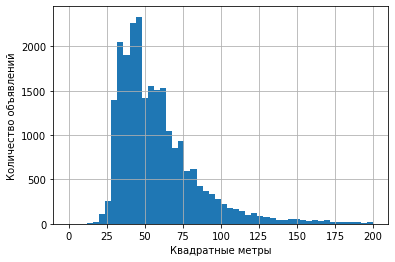

In [15]:
df['total_area'].hist(bins=50, range=(0, 200))
plt.xlabel("Квадратные метры")
plt.ylabel("Количество объявлений")

Вывод

Основная площадь продаваемых квартир не превышает 75-80 квадратных метров. Самые высокие значения в диапазоне от 30 до 50 квадратных метров.

<AxesSubplot:>

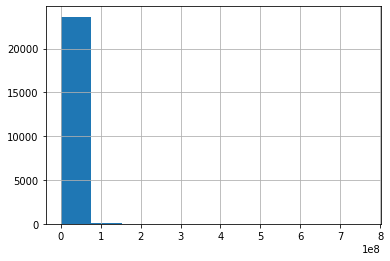

In [16]:
df['last_price'].hist()


Text(0, 0.5, 'Количество объявлений')

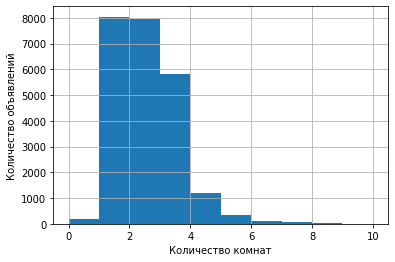

In [17]:
df['rooms'].hist(range=(0, 10))
plt.xlabel("Количество комнат")
plt.ylabel("Количество объявлений")

В датафрейме представлены в основном 1,2,3-х комнатные квартиры.

Text(0, 0.5, 'Количество объявлений')

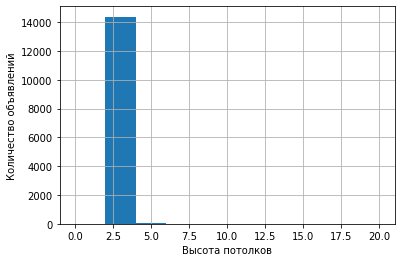

In [18]:
df['ceiling_height'].hist(range=(0,20))
plt.xlabel("Высота потолков")
plt.ylabel("Количество объявлений")

#### Время продажи квартиры

Text(0, 0.5, 'Количество объявлений')

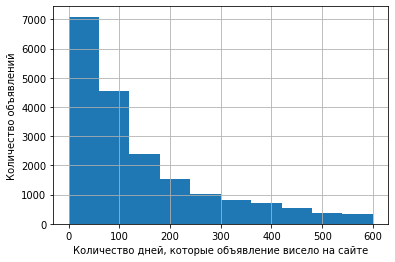

In [19]:
df['days_exposition'].hist(range=(0, 600))
plt.xlabel("Количество дней, которые объявление висело на сайте")
plt.ylabel("Количество объявлений")

In [20]:
print('Среднее время продажи квартиры составляет:', df['days_exposition'].mean().round(), 'дней')

Среднее время продажи квартиры составляет: 181.0 дней


In [21]:
print('Медианное время продажи квартиры составляет:', df['days_exposition'].median().round(), 'дней')

Медианное время продажи квартиры составляет: 95.0 дней


Среднее время продажи квартиры составляет 181 день, однако на графике можно увидеть, что в большинстве случаев, продажа квартиры не превышает 100-110 дней. 

Очень быстрым сроком продажи квартиры можно считать 50 дней, а самым необычайно долгим - 600 дней, что составляет около двух лет. 

#### Редкие и выбивающиеся значения

Исходя из данных графика можно увидеть, что редкими значениями являются те, которые выходят за пределы 400-500 дней. Можно предположить, что те, кто продавали свои квартиры более 500 дней, либо выставляли неадекватные цены, либо их квартиры находились в крайних сегментах (очень дорогие элитные квартиры, на которые трудно найти покупателя, или же очень дешевые в неблагополучных районах, а также в очень старых разваливающихся домах), либо еще что-то. 

Text(0, 0.5, 'Количество объявлений')

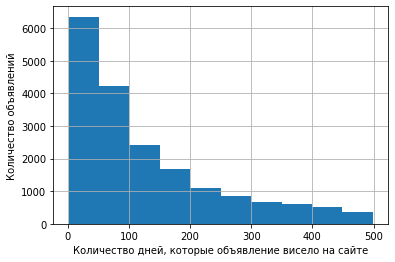

In [22]:
df2 = df.query('days_exposition < 500')
df2['days_exposition'].hist()
plt.xlabel("Количество дней, которые объявление висело на сайте")
plt.ylabel("Количество объявлений")

Более половины всех квартир были проданы менее чем за 100 дней.

### Факторы, влияющие на стоимость квартиры

Для нахождения подобной зависимости необходимо обратиться к корреляции. 

Для каждой пары значений вычислим корреляцию по Пирсону.

В конце сделаем вывод по полученным корреляциям.

#### Зависимость цены от площади

In [23]:
df['last_price'].corr(df['total_area'])

0.6536750579657242

Наблюдается корреляция между ценой на квартиру и ее площадью. 

#### Зависимость цены от числа комнат

In [24]:
df['last_price'].corr(df['rooms'])

0.3633428499648948

Между ценой на квартиру и количеством комнат наблюдается незначительная корреляция. Нельзя говорить о том, что количество комнат так уж влияет на цену квартиры.

#### Зависимость цены от удаленности от центра

In [25]:
df['last_price'].corr(df['cityCenters_nearest'])

-0.20674734874298373

Корреляция между ценой и удаленностью от центра не наблюдается, скорее даже наоборот...

#### Зависимость цены от этажа, на котором расположена квартира

Для рассмотрения вопроса зависимости цены от этажа квартиры мы не сможем воспользоваться тем же методом корреляции Пирсона в силу неподходящего формата данных об этаже, но можем вычислить медианы всех трех категорий и сравнить их.

In [26]:
first_floor = df.query('apartment_floor == "первый"')
other_floor = df.query('apartment_floor == "другой"')
last_floor = df.query('apartment_floor == "последний"')

print('Медианная цена за квадратный метр на первом этаже составляет:', first_floor['price_for_meter'].median().round())
print('Медианная цена за квадратный метр на другом этаже составляет:', other_floor['price_for_meter'].median().round())
print('Медианная цена за квадратный метр на последнем этаже составляет:', last_floor['price_for_meter'].median().round())

Медианная цена за квадратный метр на первом этаже составляет: 81224.0
Медианная цена за квадратный метр на другом этаже составляет: 98295.0
Медианная цена за квадратный метр на последнем этаже составляет: 87778.0


На первом этаже квартиры в среднем дешевле, чуть дороже квартиры на последнем этаже, а вот все остальные - самые дорогие.

#### Зависимость цены квартиры от даты размещения

Построим гистограммы по следующим категориям:

##### По дню недели

array([[<AxesSubplot:title={'center':'day_exposition'}>]], dtype=object)

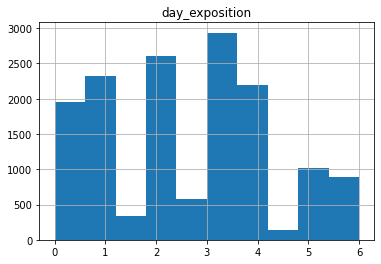

In [27]:
df.pivot_table(index='price_for_meter', values='day_exposition').hist()

Наблюдается рост цены с понедельника по пятницу (в пятницу снижение), а в выходные довольно сильный спад.

##### По месяцу

array([[<AxesSubplot:title={'center':'month_exposition'}>]], dtype=object)

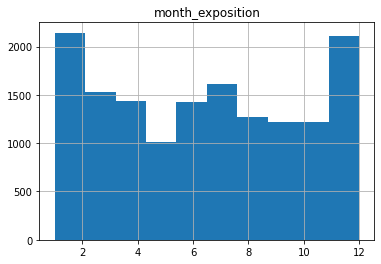

In [28]:
df.pivot_table(index='price_for_meter', values='month_exposition').hist()

Самые дорогие квартиры выставляются в декабре и январе. Самые дешевые - в мае.

##### По году

array([[<AxesSubplot:title={'center':'year_exposition'}>]], dtype=object)

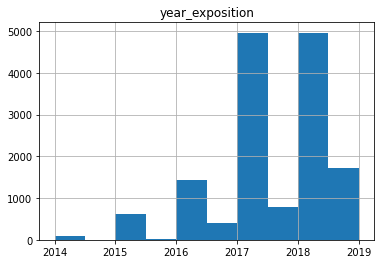

In [29]:
df.pivot_table(index='price_for_meter', values='year_exposition').hist()

In [30]:
df[['last_price', 'price_for_meter', 'total_area', 'rooms', 'cityCenters_nearest']].corr()

,last_price,price_for_meter,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.736499,0.653675,0.363343,-0.206747
price_for_meter,0.736499,1.000000,0.301960,0.055420,-0.317951
total_area,0.653675,0.301960,1.000000,0.758344,-0.231446
rooms,0.363343,0.055420,0.758344,1.000000,-0.184864
cityCenters_nearest,-0.206747,-0.317951,-0.231446,-0.184864,1.000000


До 2016 года шел плавный рост цен на квартиры, но в 2017-м произошел резкий скачек, цены продержались до 2018 года и рухнули в 2019 году почти до уровня 2016 года.

Или произошло перенасыщение рынка недвижимости, или спрос упал, потому что всему есть свой предел, даже ценам на недвижимость.

### 10 городов с наибольшим числом объявлений

Для того чтобы найти 10 городов с наибольшим числом объявлений, применим метод value_counts к столбцу с названиями населенных пунктов, выберем из них ТОП-10, а затем сохраним полученные результаты в отдельный датафрейм, в котором уже будем работать.  

In [31]:
df['locality_name'].value_counts().head(10)

Санкт-Петербург      15721
посёлок Мурино         522
посёлок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

In [32]:
cities = df[df['locality_name'].isin(['Санкт-Петербург', 'посёлок Мурино', 'посёлок Шушары', 'Всеволожск', 'Пушкин', 'Колпино', 'посёлок Парголово', 'Гатчина', 'деревня Кудрово', 'Выборг'])]

In [33]:
mean_price = cities.pivot_table(index='locality_name', values='price_for_meter', aggfunc='mean')
mean_price

,price_for_meter
locality_name,
Всеволожск,68654.473986
Выборг,58141.909153
Гатчина,68746.146763
Колпино,75424.579098
Пушкин,103125.819291
Санкт-Петербург,114849.008794
деревня Кудрово,92473.547576
посёлок Мурино,85752.189195
посёлок Парголово,90175.913458


In [34]:
mean_price.sort_values(by='price_for_meter', ascending=False)

,price_for_meter
locality_name,
Санкт-Петербург,114849.008794
Пушкин,103125.819291
деревня Кудрово,92473.547576
посёлок Парголово,90175.913458
посёлок Мурино,85752.189195
посёлок Шушары,78677.364217
Колпино,75424.579098
Гатчина,68746.146763
Всеволожск,68654.473986


Самым высоким населенным пунктом по средней стоимости жилья является Санкт-Петербург, а самая низкая средняя цена в Выборге.

### Квартиры в Санкт-Петербурге

Создадим датасет, где будет срез данных по Санкт-Петербургу, а затем напишем функцию, которая переведт расстояние доцентра из метров в километры и сохранит их в отдельном столбце.


In [35]:
sp_apartments = df.query('locality_name == "Санкт-Петербург"')
sp_apartments

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_meter,day_exposition,month_exposition,year_exposition,apartment_floor,ratio_living_area,ratio_kitchen_area
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,NaN,...,2.0,755.0,NaN,120370.370370,3,3,2019,другой,47.222222,23.148148
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.3,4,NaN,...,2.0,574.0,558.0,92785.714286,3,8,2015,другой,61.250000,14.821429
3,0,64900000.0,159.00,2015-07-24,3,NaN,14,NaN,9,NaN,...,3.0,234.0,424.0,408176.100629,4,7,2015,другой,NaN,NaN
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,NaN,...,1.0,48.0,121.0,100000.000000,1,6,2018,другой,32.000000,41.000000
7,5,7915000.0,71.60,2019-04-18,2,NaN,24,NaN,22,NaN,...,0.0,NaN,NaN,110544.692737,3,4,2019,другой,NaN,26.396648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550000.0,35.30,2018-02-28,1,2.86,15,16.3,4,NaN,...,2.0,652.0,29.0,100566.572238,2,2,2018,другой,46.175637,25.779037
23690,3,5500000.0,52.00,2018-07-19,2,NaN,5,31.0,2,NaN,...,0.0,NaN,15.0,105769.230769,3,7,2018,другой,59.615385,11.538462
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25,40.3,7,NaN,...,1.0,806.0,519.0,129903.978052,3,10,2016,другой,55.281207,14.540466
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,NaN,...,3.0,381.0,NaN,72490.845228,1,3,2017,другой,54.779164,10.335550


In [36]:
def center_distance (row):
    distance = row / 1000
    return distance

pd.set_option('mode.chained_assignment', None)
sp_apartments['center_distance'] =  sp_apartments['cityCenters_nearest'].apply(center_distance)
sp_apartments['center_distance'] = sp_apartments['center_distance'].round().astype('Int64')

sp_apartments.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_for_meter,day_exposition,month_exposition,year_exposition,apartment_floor,ratio_living_area,ratio_kitchen_area,center_distance
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,755.0,NaN,120370.370370,3,3,2019,другой,47.222222,23.148148,16
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,NaN,...,574.0,558.0,92785.714286,3,8,2015,другой,61.250000,14.821429,14
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,NaN,9,NaN,...,234.0,424.0,408176.100629,4,7,2015,другой,NaN,NaN,7
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,48.0,121.0,100000.000000,1,6,2018,другой,32.000000,41.000000,8
7,5,7915000.0,71.6,2019-04-18,2,NaN,24,NaN,22,NaN,...,NaN,NaN,110544.692737,3,4,2019,другой,NaN,26.396648,12
9,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,NaN,...,NaN,289.0,88524.590164,6,2,2017,другой,71.475410,10.655738,15
10,5,5050000.0,39.6,2017-11-16,1,2.67,12,20.3,3,NaN,...,553.0,137.0,127525.252525,3,11,2017,другой,51.262626,21.464646,14
15,16,4650000.0,39.0,2017-11-18,1,NaN,14,20.5,5,NaN,...,296.0,19.0,119230.769231,5,11,2017,другой,52.564103,19.487179,14
16,11,6700000.0,82.0,2017-11-23,3,3.05,5,55.6,1,NaN,...,NaN,397.0,81707.317073,3,11,2017,первый,67.804878,10.975610,11
17,6,4180000.0,36.0,2016-09-09,1,NaN,17,16.5,7,NaN,...,859.0,571.0,116111.111111,4,9,2016,другой,45.833333,30.555556,15


Определяем среднюю цену для каждого километра

In [37]:
sp_apartments['price_for_km'] = sp_apartments['price_for_meter'] / sp_apartments['center_distance']
sp_apartments.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_for_meter,day_exposition,month_exposition,year_exposition,apartment_floor,ratio_living_area,ratio_kitchen_area,center_distance,price_for_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,NaN,120370.370370,3,3,2019,другой,47.222222,23.148148,16,7523.148148
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,NaN,...,558.0,92785.714286,3,8,2015,другой,61.250000,14.821429,14,6627.55102
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,NaN,9,NaN,...,424.0,408176.100629,4,7,2015,другой,NaN,NaN,7,58310.871518
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,121.0,100000.000000,1,6,2018,другой,32.000000,41.000000,8,12500.0
7,5,7915000.0,71.6,2019-04-18,2,NaN,24,NaN,22,NaN,...,NaN,110544.692737,3,4,2019,другой,NaN,26.396648,12,9212.057728
9,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,NaN,...,289.0,88524.590164,6,2,2017,другой,71.475410,10.655738,15,5901.639344
10,5,5050000.0,39.6,2017-11-16,1,2.67,12,20.3,3,NaN,...,137.0,127525.252525,3,11,2017,другой,51.262626,21.464646,14,9108.946609
15,16,4650000.0,39.0,2017-11-18,1,NaN,14,20.5,5,NaN,...,19.0,119230.769231,5,11,2017,другой,52.564103,19.487179,14,8516.483516
16,11,6700000.0,82.0,2017-11-23,3,3.05,5,55.6,1,NaN,...,397.0,81707.317073,3,11,2017,первый,67.804878,10.975610,11,7427.937916
17,6,4180000.0,36.0,2016-09-09,1,NaN,17,16.5,7,NaN,...,571.0,116111.111111,4,9,2016,другой,45.833333,30.555556,15,7740.740741


Построим график для определения границы центральной зоны

array([[<AxesSubplot:title={'center':'center_distance'}>]], dtype=object)

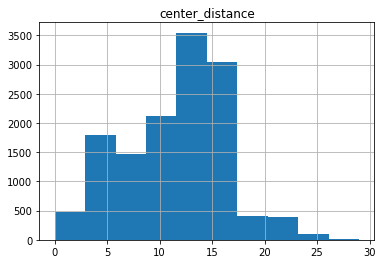

In [38]:
sp_apartments.pivot_table(index='price_for_km', values='center_distance').hist()

<AxesSubplot:xlabel='center_distance'>

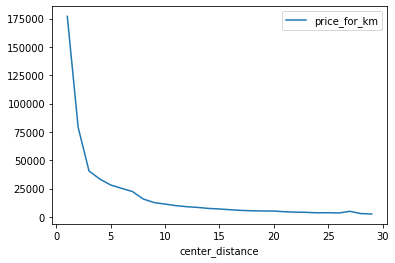

In [39]:
sp_apartments.pivot_table(index='center_distance', values='price_for_km').plot()

По графику можно сделать вывод о том, что центральной зоной является расстояние до 5 километров, именно здесь график сильно меняется.

### Квартиры в центре

Для выделения квартир в центре воспользуемся методом срезов.

In [40]:
center_apartments = sp_apartments.query('center_distance < 5')
center_apartments.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_for_meter,day_exposition,month_exposition,year_exposition,apartment_floor,ratio_living_area,ratio_kitchen_area,center_distance,price_for_km
24,8,6500000.0,97.2,2015-10-31,2,NaN,3,46.50,1,NaN,...,265.0,66872.427984,5,10,2015,первый,47.839506,20.164609,2,33436.213992
35,6,15500000.0,149.0,2017-06-26,5,NaN,5,104.00,4,NaN,...,644.0,104026.845638,0,6,2017,другой,69.798658,11.409396,4,26006.711409
61,18,7990000.0,74.0,2017-08-24,2,NaN,4,43.00,4,NaN,...,609.0,107972.972973,3,8,2017,последний,58.108108,27.027027,4,26993.243243
99,32,9600000.0,90.0,2017-09-26,4,NaN,5,67.00,2,NaN,...,104.0,106666.666667,1,9,2017,другой,74.444444,8.888889,3,35555.555556
121,20,33000000.0,180.0,2017-02-17,3,2.90,9,86.00,8,False,...,144.0,183333.333333,4,2,2017,другой,47.777778,13.333333,4,45833.333333
136,16,6500000.0,51.8,2018-08-01,2,3.45,6,25.60,2,NaN,...,163.0,125482.625483,2,8,2018,другой,49.420849,14.092664,4,31370.656371
137,11,13310800.0,85.1,2018-01-01,2,2.70,10,31.52,5,NaN,...,340.0,156413.631022,0,1,2018,другой,37.038778,31.551116,4,39103.407756
138,8,4800000.0,40.0,2017-11-18,2,NaN,3,29.00,2,NaN,...,80.0,120000.000000,5,11,2017,другой,72.500000,15.000000,3,40000.0
147,10,27700000.0,179.6,2017-07-06,5,2.85,25,97.20,25,NaN,...,75.0,154231.625835,3,7,2017,последний,54.120267,18.819599,4,38557.906459
154,1,8200000.0,80.0,2018-11-06,3,4.15,3,44.20,2,NaN,...,38.0,102500.000000,1,11,2018,другой,55.250000,15.250000,3,34166.666667


#### Изучаем параметры

Площадь квартир

<AxesSubplot:>

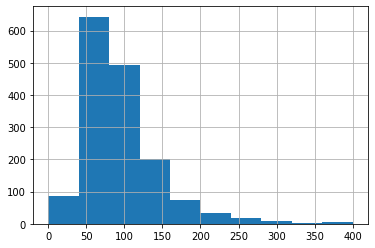

In [41]:
center_apartments['total_area'].hist(range=(0,400))

Больше всего квартир с площадью от 40 до 70 квадратных метров, что соотносится с общими данными.

Цена

<AxesSubplot:>

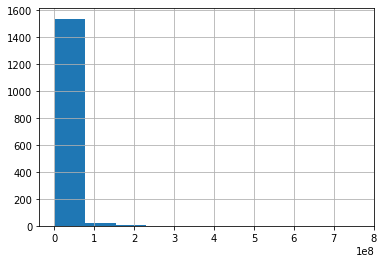

In [42]:
center_apartments['last_price'].hist()

Цена находится на одном уровне.

Число комнат

<AxesSubplot:>

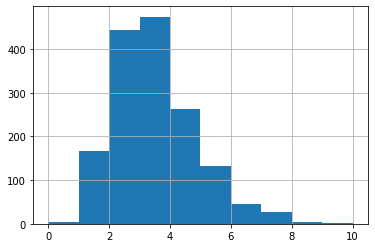

In [43]:
center_apartments['rooms'].hist(range=(0,10))

В центре города больше всего продают квартиры с числом комнат до 4

Высота потолков

<AxesSubplot:>

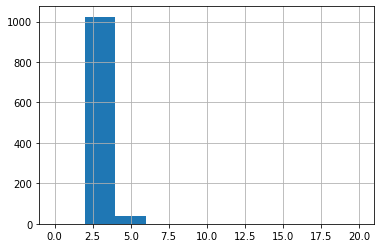

In [44]:
center_apartments['ceiling_height'].hist(range=(0,20))

Потолки стандартные - 2,5 метра.

#### Зависимость цены от числа комнат

In [45]:
center_apartments['last_price'].corr(center_apartments['rooms'])

0.24666476375827653

Наблюдается хоть и не значительная, но корреляция между ценой на квартиру и количеством комнат.

#### Зависимость цены от этажа

In [46]:
first_floor = center_apartments.query('apartment_floor == "первый"')
other_floor = center_apartments.query('apartment_floor == "другой"')
last_floor = center_apartments.query('apartment_floor == "последний"')

print('Медианная цена за квадратный метр на первом этаже составляет:', first_floor['price_for_meter'].median().round())
print('Медианная цена за квадратный метр на другом этаже составляет:', other_floor['price_for_meter'].median().round())
print('Медианная цена за квадратный метр на последнем этаже составляет:', last_floor['price_for_meter'].median().round())

Медианная цена за квадратный метр на первом этаже составляет: 110142.0
Медианная цена за квадратный метр на другом этаже составляет: 120580.0
Медианная цена за квадратный метр на последнем этаже составляет: 114000.0


Наблюдается похожая картина с общими данными: самые дешевые квартиры расположены на первых этажах, а самые дорогие - на других, но не последних.

#### Зависимость цены от удаленности от центра

In [47]:
center_apartments['last_price'].corr(center_apartments['cityCenters_nearest'])

-0.10948678028100199

Как и общем случае, корреляции по данному параметру не наблюдается.

#### Зависимость цены от даты размещения объявления

##### По дню недели

array([[<AxesSubplot:title={'center':'day_exposition'}>]], dtype=object)

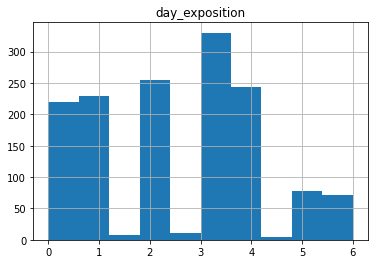

In [48]:
center_apartments.pivot_table(index='price_for_meter', values='day_exposition').hist()

Ситуация схожа с общими данными - наблюдается рост цены с понедельника по пятницу (в пятницу снижение), а в выходные довольно сильный спад.

##### По месяцу

array([[<AxesSubplot:title={'center':'month_exposition'}>]], dtype=object)

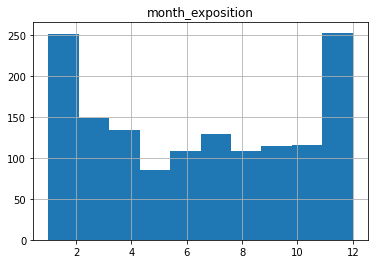

In [49]:
center_apartments.pivot_table(index='price_for_meter', values='month_exposition').hist()

Самые дорогие квартиры выставляются в декабре и январе. Самые дешевые - в мае. Все так же.

##### По году

array([[<AxesSubplot:title={'center':'year_exposition'}>]], dtype=object)

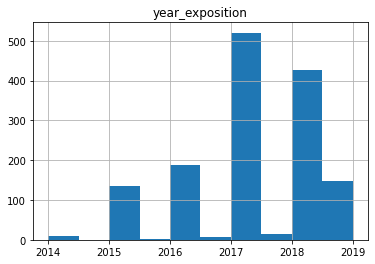

In [50]:
center_apartments.pivot_table(index='price_for_meter', values='year_exposition').hist()

До 2016 года шел плавный рост цен на квартиры, но в 2017-м произошел резкий скачек, цены продержались до 2018 года и рухнули в 2019 году почти до уровня 2016 года.
График практически идентичен графику по общим данным.

## Общий вывод

По итогам проведенного исследования можно сделать следующие выводы:


1. Основная площадь продаваемых квартир не превышает 75-80 квадратных метров. Самые высокие значения в диапазоне от 30 до 50 квадратных метров.
2. Среднее время продажи квартиры составляет 181 день, однако на графике можно увидеть, что в большинстве случаев, продажа квартиры не превышает 100-110 дней. 
3. Очень быстрым сроком продажи квартиры можно считать 50 дней, а самым необычайно долгим - 600 дней, что составляет около двух лет. 
4. Наблюдается корреляция между ценой на квартиру и ее площадью. 
5. Между ценой на квартиру и количеством комнат наблюдается незначительная корреляция. Нельзя говорить о том, что количество комнат так уж влияет на цену квартиры.
6. Корреляция между ценой и удаленностью от центра не наблюдается, скорее даже наоборот...
7. На первом этаже квартиры в среднем дешевле, чуть дороже квартиры на последнем этаже, а вот все остальные - самые дорогие.
8. Наблюдается рост цены с понедельника по пятницу (в пятницу снижение), а в выходные довольно сильный спад.
9. Самые дорогие квартиры выставляются в декабре и январе. Самые дешевые - в мае.
10. До 2016 года шел плавный рост цен на квартиры, но в 2017-м произошел резкий скачек, цены продержались до 2018 года и рухнули в 2019 году почти до уровня 2016 года.
11. Санкт-Петербург ожидаемо лидирует по количеству объявлений о продаже квартир
12. Для центра Санкт-Петербурга характерны те же результаты, что и для общего количества квартир.